# English to French Translation

### STEP 1: IMPORTING LIBRARIES

In [1]:
!pip install tensorflow
!pip install --upgrade tensorflow-gpu==2.0
!pip install nltk 
!pip install gensim

!pip install spacy
!pip install plotly
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install jupyterthemes
!pip install sklearn

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1)
ERROR: No matching distribution found for tensorflow-gpu==2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.6 requires scikit-plot, which is not installed.
pycaret 2.3.6 requires seaborn, which is not installed.
pycaret 2.3.6 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.6 requires scikit-learn==0.23.2, but you have scikit-learn 1.1.3 which is incompatible.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.6 requires scikit-plot, which is not installed.
pycaret 2.3.6 requires pyyaml<6.0.0, but you have pyyaml 6.0 which is incompatible.
pycaret 2.3.6 requires scikit-learn==0.23.2, but you have scikit-learn 1.1.3 which is incompatible.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.


  Using cached sklearn-0.0.post1-py3-none-any.whl


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAMAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAMAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### STEP 2: LOADING THE DATASET

In [3]:
df_english = pd.read_csv('vocab_en.csv', sep = '\t', names = ['english'])
df_french = pd.read_csv('vocab_fr.csv', sep = '\t', names = ['french'])

In [4]:
# CHECKING IF NULL ELEMENTS ARE PRESENT OR NOT IN BOTH DATASETS
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [5]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [6]:
# THUS WE HAVE NO NULL ELEMENTS PRESENT
# CONCATENATING BOTH THE DATAFRAMES (df_english and df_french)
df = pd.DataFrame([df_english['english'],df_french['french']])
df = df.T
df

english  \
0       new jersey is sometimes quiet during autumn , ...   
1       the united states is usually chilly during jul...   
2       california is usually quiet during march , and...   
3       the united states is sometimes mild during jun...   
4       your least liked fruit is the grape , but my l...   
...                                                   ...   
137855  france is never busy during march , and it is ...   
137856  india is sometimes beautiful during spring , a...   
137857  india is never wet during summer , but it is s...   
137858  france is never chilly during january , but it...   
137859  the orange is her favorite fruit , but the ban...   

                                                   french  
0       new jersey est parfois calme pendant l' automn...  
1       les états-unis est généralement froid en juill...  
2       california est généralement calme en mars , et...  
3       les états-unis est parfois légère en juin , et...  
4       votre moins aimé fruit est le raisin , mais mo...  
...                                                   ...  
137855  la france est jamais occupée en mars , et il e...  
137856  l' inde est parfois belle au printemps , et il...  
137857  l' inde est jamais mouillé pendant l' été , ma...  
137858  la france est jamais froid en janvier , mais i...  
137859  l'orange est son fruit préféré , mais la banan...  

[137860 rows x 2 columns]

### STEP 3: PERFORMING DATA CLEANING

In [7]:
# REMOVING PUNCTUATIONS FROM OUR TEXT

def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [8]:
# CHECKINH HOW MANY UNIQUE WORDS ARE PRESENT IN THE ENGLISH DICTIONARY
english_words = []
for i in df['english'].values:
    for j in i.split(" "):
        english_words.append(j)
english_words = list(set(english_words))
english_words = english_words[1:]

len(english_words)

199

In [9]:
french_words = []
for i in df['french'].values:
    for j in i.split(" "):
        french_words.append(j)
french_words = list(set(french_words))
french_words = french_words[1:]

len(french_words)

350

In [10]:
english_words

['wonderful',
 'did',
 'go',
 'snakes',
 'hot',
 'animals',
 'were',
 'a',
 'bear',
 'we',
 'tower',
 'grapefruit',
 'december',
 'little',
 'apples',
 'mango',
 'have',
 'last',
 'january',
 'between',
 'never',
 'lions',
 'pear',
 'lime',
 'pears',
 'monkey',
 'why',
 'relaxing',
 'his',
 'thinks',
 'march',
 'mangoes',
 'apple',
 'bears',
 'new',
 'may',
 'she',
 'dislikes',
 'red',
 'want',
 'went',
 'winter',
 'snake',
 'the',
 'field',
 'is',
 'grapes',
 'disliked',
 'september',
 'august',
 'driving',
 'yellow',
 'peach',
 'he',
 'dislike',
 'visit',
 'do',
 'shiny',
 'wanted',
 'car',
 'quiet',
 'drives',
 'busy',
 'cold',
 'our',
 'july',
 'you',
 'favorite',
 'lake',
 "isn't",
 'sometimes',
 'bananas',
 'elephants',
 'likes',
 'this',
 'warm',
 'rabbits',
 'chilly',
 'october',
 'nice',
 'horses',
 'paris',
 'when',
 'weather',
 'drove',
 'orange',
 'least',
 'saw',
 'wants',
 'plans',
 'fun',
 'spring',
 'june',
 'wet',
 'fall',
 'translating',
 'think',
 'animal',
 'does',


### STEP 4: VISUALIZING DATASET

In [11]:
# GETING FREQUENCY OF EACH WORD
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)
    
english_words_counts = Counter(words)

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)



In [12]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [13]:
# APPENDING VALUES TO DIFFERENT LISTS FOR VISUALIZATION PURPOSES
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [14]:
# PLOTTING BARPLOT USING PLOTLY
fig = px.bar(x = english_words, y = english_counts)
fig.show()

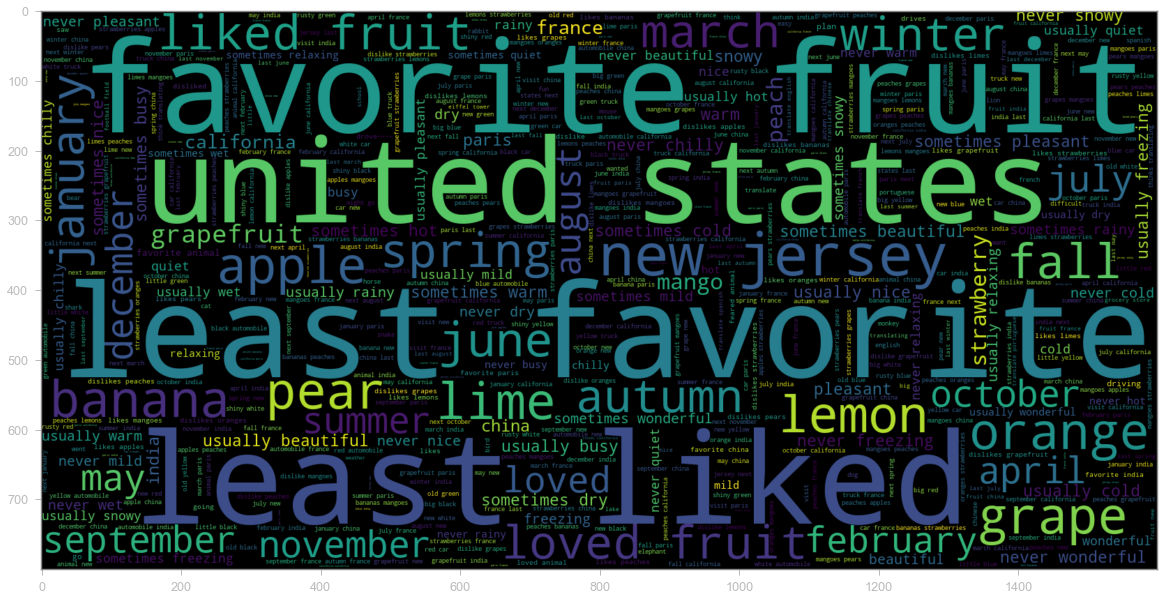

In [15]:
# PLOTTING A WORDCLOUD FOR ENGLISH
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.english))


plt.imshow(wc, interpolation='bilinear')

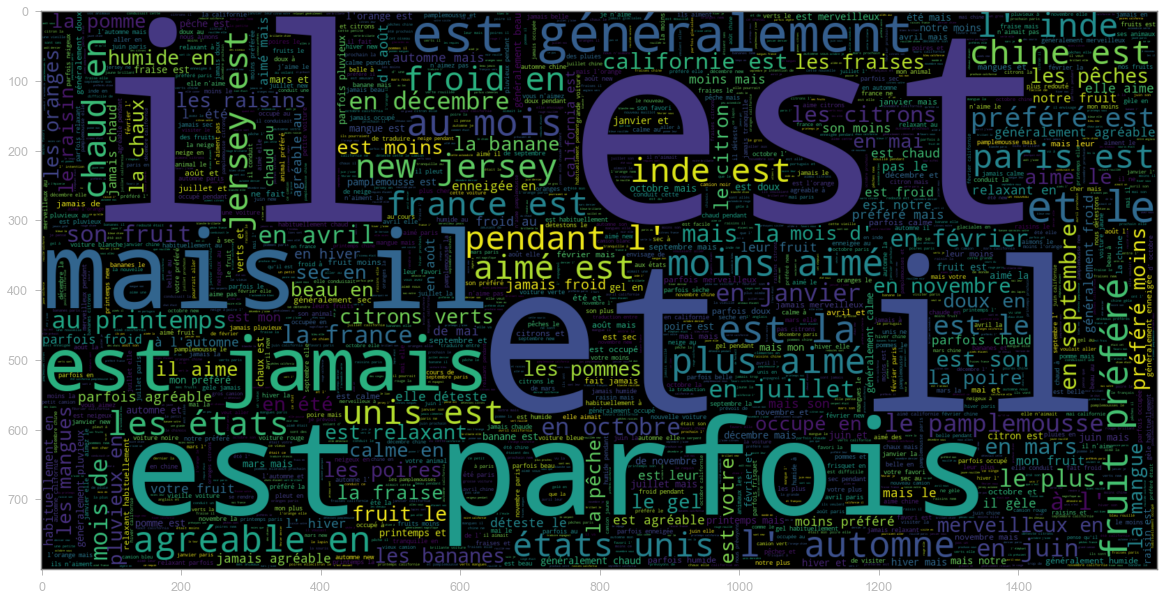

In [16]:
# PLOTTING WORDCLOUD FOR FRENCH LANGUAGE
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.french))


plt.imshow(wc, interpolation='bilinear')

In [17]:
# FINDING THE MAXIMUM LENGTH IN THE ENGLISH DATAFRAME

maxlen_english = 0
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if maxlen_english < len(tokens):
        maxlen_english = len(tokens)
maxlen_english

15

In [18]:
# FINDING THE MAXIMUM LENGTH IN THE FRENCH DATAFRAME

maxlen_french = 0
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if maxlen_french< len(tokens):
        maxlen_french = len(tokens)
maxlen_french

23

### STEP 5: PREPARING THE DATA BY PERFORMING TOKENIZING AND PADDING

In [19]:
# CONVERTING OUR TEXT TO NUMBERS TO BUILD AI MODEL

def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')  #TO MAKE LENGTH OF EACH TOKENIZED TEXT EQUAL
    return tokenizer, sequences, padded

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)



In [20]:
# TRAIN AND TEST SPLITTING THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

### STEP 6: BUILDING AND TRAINING THE LSTM MODEL

In [21]:
# TOTAL VOCAB SIZE, SINCE WE ADDED PADDING QE ADD 1 TO THE TOTAL WORD COUNT

english_vocab_size = len(english_words) + 1
french_vocab_size = len(french_words) + 1

# SEQUENTIAL MODEL
model = Sequential()

# ADDING EMBEDDING LAYER

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))

# DECODER
# ADDING REPEAT VECTOR

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 256)           51200     
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 repeat_vector (RepeatVector  (None, 23, 256)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 23, 256)           525312    
                                                                 
 time_distributed (TimeDistr  (None, 23, 351)          90207     
 ibuted)                                                         
                                                                 
Total params: 1,192,031
Trainable params: 1,192,031
Non-

In [22]:
# CHANGING SHAPE OF TARGET FROM 2D TO 3D
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [23]:
# FINALLY TRAINING THE MODEL
 
model.fit(X_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 15)

Epoch 1/15
110/110 [==============================] - 273s 2s/step - loss: 2.7331 - accuracy: 0.4940 - val_loss: 2.1122 - val_accuracy: 0.5432
Epoch 2/15
110/110 [==============================] - 283s 3s/step - loss: 1.8346 - accuracy: 0.5761 - val_loss: 1.5849 - val_accuracy: 0.6076
Epoch 3/15
110/110 [==============================] - 260s 2s/step - loss: 1.4851 - accuracy: 0.6194 - val_loss: 1.3626 - val_accuracy: 0.6411
Epoch 4/15
110/110 [==============================] - 263s 2s/step - loss: 1.2686 - accuracy: 0.6560 - val_loss: 1.1904 - val_accuracy: 0.6664
Epoch 5/15
110/110 [==============================] - 285s 3s/step - loss: 1.1173 - accuracy: 0.6848 - val_loss: 1.0670 - val_accuracy: 0.7005
Epoch 6/15
110/110 [==============================] - 275s 3s/step - loss: 0.9845 - accuracy: 0.7188 - val_loss: 0.9319 - val_accuracy: 0.7307
Epoch 7/15
110/110 [==============================] - 279s 3s/step - loss: 0.8677 - accuracy: 0.7484 - val_loss: 0.8207 - val_accuracy: 0.7606

In [24]:
# SAVING THE MODEL

model.save("Translator.h5")

### STEP 7: ASSES TRAINED MODEL PERFORMANCE

In [74]:
y_predict = model.predict(X_test)

def prediction(X, X_tokenizer = x_tokenizer, y_tokenizer = y_tokenizer):
    predictions = model.predict(X)
    id_to_word = {id: word for word, id in y_tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join(set([id_to_word[j] for j in np.argmax(predictions, 1)[0]]))

def pad_to_text(padded, tokenizer):
    id_to_word = {id: word for word, id in tokenizer.word_index.items()}
    id_to_word[0] = ''
    return ' '.join([id_to_word[j] for j in padded])


for i in range(5):
    print('Original English Text - {}\n'.format(pad_to_text(X_test[i], x_tokenizer)))
    print('Original French Text - {}\n'.format(pad_to_text(y_test[i], y_tokenizer)))
    print('Predicted French Text - {}\n\n\n'.format(prediction(X_test[i:i+1])))

Original English Text - she likes pears apples and bananas         

Original French Text - elle aime les poires les pommes et les bananes              

Predicted French Text -  la mais est préféré et froid agréable jamais il de en parfois le



Original English Text - the strawberry is our favorite fruit but the banana is his favorite   

Original French Text - la fraise est notre fruit préféré mais la banane est son favori           

Predicted French Text -  la mais l' moins est préféré et généralement jamais il de en parfois les le



Original English Text - your least liked fruit is the strawberry but their least liked is the grapefruit 

Original French Text - votre moins aimé fruit est la fraise mais leur moins aimé est le pamplemousse         

Predicted French Text -  moins il les l' la mais aimé son fruit chaud le et froid généralement jamais de en est au parfois



Original English Text - new jersey is never wet during october but it is usually chilly in summer 

Original F